# Bringing features onto the same scale

Credits
- Sebastian Raschka: (http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
- Jason Brownlee: (http://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

# Standardization
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.


In [1]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('./Datasets/pima-indians-diabetes.txt', header=None)
array = dataframe.values

In [3]:
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

In [4]:
print(X[0:5,:])

[[  6.00000000e+00   1.48000000e+02   7.20000000e+01   3.50000000e+01
    0.00000000e+00   3.36000000e+01   6.27000000e-01   5.00000000e+01]
 [  1.00000000e+00   8.50000000e+01   6.60000000e+01   2.90000000e+01
    0.00000000e+00   2.66000000e+01   3.51000000e-01   3.10000000e+01]
 [  8.00000000e+00   1.83000000e+02   6.40000000e+01   0.00000000e+00
    0.00000000e+00   2.33000000e+01   6.72000000e-01   3.20000000e+01]
 [  1.00000000e+00   8.90000000e+01   6.60000000e+01   2.30000000e+01
    9.40000000e+01   2.81000000e+01   1.67000000e-01   2.10000000e+01]
 [  0.00000000e+00   1.37000000e+02   4.00000000e+01   3.50000000e+01
    1.68000000e+02   4.31000000e+01   2.28800000e+00   3.30000000e+01]]


In [5]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [6]:
# summarize transformed data
print(rescaledX[0:5,:])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


# Min-Max scaling

Often also simply called "normalization" - a common cause for ambiguities).  
In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [9]:
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.353  0.744  0.59   0.354  0.     0.501  0.234  0.483]
 [ 0.059  0.427  0.541  0.293  0.     0.396  0.117  0.167]
 [ 0.471  0.92   0.525  0.     0.     0.347  0.254  0.183]
 [ 0.059  0.447  0.541  0.232  0.111  0.419  0.038  0.   ]
 [ 0.     0.688  0.328  0.354  0.199  0.642  0.944  0.2  ]]


 # Binarize Data (Make Binary)

You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0.

This is called binarizing your data or threshold your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

In [10]:
# binarization
from sklearn.preprocessing import Binarizer

In [11]:
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

In [12]:
# summarize transformed data
numpy.set_printoptions(precision=3)
print(binaryX[0:5,:])

[[ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.]]


# Let's visualize the effect


In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Datasets/wine.data', header=None,usecols=[0,1,2])

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

### Apply Standardization

In [14]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

In [15]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


### MinMaxScaler

In [16]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [17]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


#### Plotting

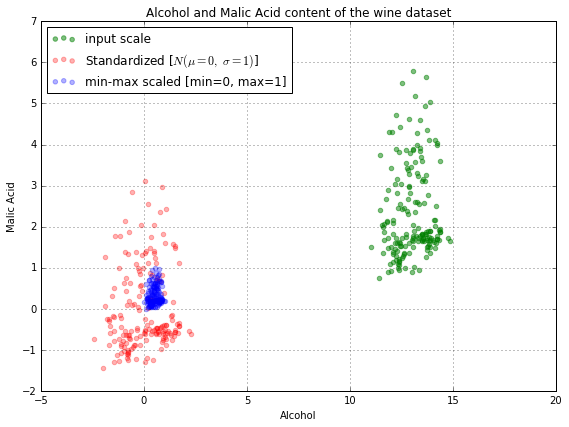

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

# Standadization or Normalization ..?


<img src="Images/Stay_Tuned.jpg" width="50%">